In [1]:
!conda activate tf

In [2]:
!conda info


     active environment : tf
    active env location : C:\Users\pdine\anaconda3\envs\tf
            shell level : 2
       user config file : C:\Users\pdine\.condarc
 populated config files : 
          conda version : 4.14.0
    conda-build version : 3.21.8
         python version : 3.9.12.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\pdine\anaconda3  (writable)
      conda av data dir : C:\Users\pdine\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : C:\Users\pdine\anaconda3\p

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
indices = np.random.randint(729, size = 10)
print(indices)
fig,ax1=plt.subplots()
for i in indices:
    s_i = np.genfromtxt('../branchruns3/storms/LongIsland_%04d.storm'% i,skip_header = 3)
    q_i = np.genfromtxt('../branchruns3/branching_outputs/%04d_output/gauge00001.txt'% i,skip_header=10, usecols = [0,1,5])
    ts = (q_i[:,0] >= 4)
    ax1.plot(q_i[ts,1]/3600,q_i[ts,2])
    ax1.set_xlabel("t/h")
    ax2=ax1.twinx()
    ax2.plot(s_i[:,0]/3600, s_i[:,2], '--')
plt.show()
    

In [11]:


q = pd.read_csv('q.csv',header=None)
storms = pd.read_csv('storms.csv')

In [12]:
q.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.114625,0.115346,0.116006,0.116608,0.117151,0.117638,0.118069,0.118446,0.118771,0.119047,...,0.672913,0.676073,0.679145,0.682329,0.685564,0.688806,0.692050,0.695302,0.698565,0.701825
1,0.114625,0.115346,0.116006,0.116608,0.117151,0.117638,0.118069,0.118446,0.118771,0.119047,...,0.875377,0.877649,0.879761,0.881715,0.883510,0.885140,0.886603,0.887895,0.889013,0.889957
2,0.114625,0.115346,0.116006,0.116608,0.117151,0.117638,0.118069,0.118446,0.118771,0.119047,...,0.050605,0.049577,0.048660,0.047865,0.047187,0.046626,0.046185,0.045867,0.045674,0.045607
3,0.114625,0.115346,0.116006,0.116608,0.117151,0.117638,0.118069,0.118446,0.118771,0.119047,...,0.093835,0.097323,0.100867,0.104497,0.108201,0.111973,0.115847,0.119800,0.123808,0.127902
4,0.115984,0.116736,0.117429,0.118063,0.118639,0.119158,0.119621,0.120030,0.120387,0.120694,...,0.795392,0.790876,0.786229,0.781444,0.776515,0.771444,0.766236,0.760897,0.755435,0.749858


In [13]:
storms.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5
0,-71.0,33.9,-71.057772,35.549936,-71.115544,37.199871,-71.173317,38.849807,-71.231089,40.499742,-71.288861,40.441970
1,-71.0,33.9,-71.057772,35.549936,-71.115544,37.199871,-71.173317,38.849807,-71.231089,40.499742,-71.849688,39.881143
2,-71.0,33.9,-71.057772,35.549936,-71.115544,37.199871,-71.173317,38.849807,-71.231089,40.499742,-72.335903,39.394928
3,-71.0,33.9,-71.057772,35.549936,-71.115544,37.199871,-71.173317,38.849807,-71.231089,40.499742,-72.688861,39.041970
4,-71.0,33.9,-71.057772,35.549936,-71.115544,37.199871,-71.173317,38.849807,-71.791916,40.380480,-72.410515,39.761880


In [7]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


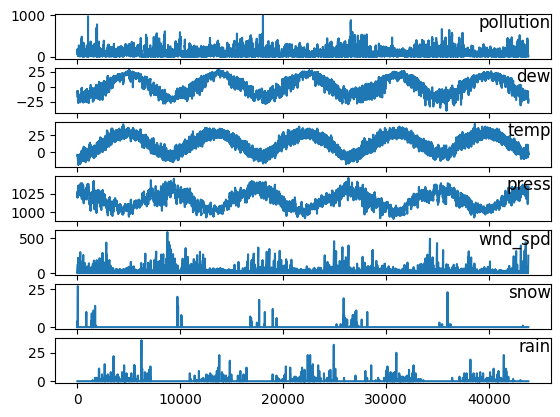

In [8]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [9]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)

values = dataset.values
print(values)

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

[[129.0 -16 -4.0 ... 1.79 0 0]
 [148.0 -15 -4.0 ... 2.68 0 0]
 [159.0 -11 -5.0 ... 3.57 0 0]
 ...
 [10.0 -22 -3.0 ... 242.7 0 0]
 [8.0 -22 -4.0 ... 246.72 0 0]
 [12.0 -21 -3.0 ... 249.85 0 0]]
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  


In [10]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


Epoch 1/50
122/122 - 5s - loss: 0.0578 - val_loss: 0.0554
Epoch 2/50
122/122 - 1s - loss: 0.0401 - val_loss: 0.0535
Epoch 3/50
122/122 - 1s - loss: 0.0235 - val_loss: 0.0428
Epoch 4/50
122/122 - 1s - loss: 0.0167 - val_loss: 0.0366
Epoch 5/50
122/122 - 1s - loss: 0.0156 - val_loss: 0.0243
Epoch 6/50
122/122 - 1s - loss: 0.0150 - val_loss: 0.0182
Epoch 7/50
122/122 - 1s - loss: 0.0148 - val_loss: 0.0170
Epoch 8/50
122/122 - 1s - loss: 0.0148 - val_loss: 0.0159
Epoch 9/50
122/122 - 1s - loss: 0.0146 - val_loss: 0.0148
Epoch 10/50
122/122 - 1s - loss: 0.0146 - val_loss: 0.0143
Epoch 11/50
122/122 - 1s - loss: 0.0145 - val_loss: 0.0146
Epoch 12/50
122/122 - 1s - loss: 0.0146 - val_loss: 0.0140
Epoch 13/50
122/122 - 2s - loss: 0.0145 - val_loss: 0.0139
Epoch 14/50
122/122 - 1s - loss: 0.0145 - val_loss: 0.0138
Epoch 15/50
122/122 - 1s - loss: 0.0145 - val_loss: 0.0136
Epoch 16/50
122/122 - 1s - loss: 0.0145 - val_loss: 0.0136
Epoch 17/50
122/122 - 1s - loss: 0.0144 - val_loss: 0.0136
Epoch 

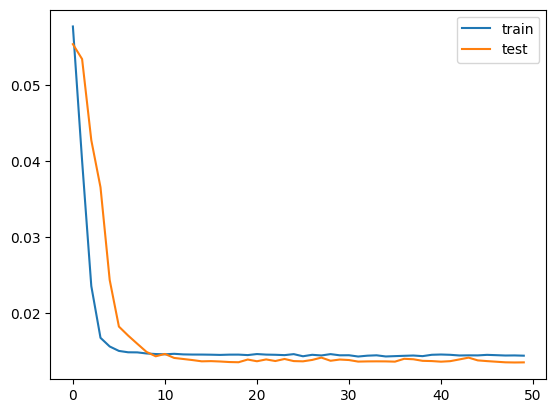

In [11]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [18]:
from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: in user code:

    C:\Users\pdine\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1584 predict_function  *
        return step_function(self, iterator)
    C:\Users\pdine\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1574 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\pdine\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\pdine\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\pdine\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\pdine\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1567 run_step  **
        outputs = model.predict_step(data)
    C:\Users\pdine\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1540 predict_step
        return self(x, training=False)
    C:\Users\pdine\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1040 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\pdine\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:215 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 8)


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  
(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)
Epoch 1/50
122/122 - 5s - loss: 0.0595 - val_loss: 0.0483
Epoch 2/50
122/122 - 1s - loss: 0.0386 - val_loss: 0.0468
Epoch 3/50
122/122 - 1s - loss: 0.0220 - val_loss: 0.0355
Epoch 4/50
122/122 - 1s - loss: 0.0167 - val_loss: 0.0278
Epoch 5/50
122/122 - 1s - loss: 0.0153 - val_loss: 0.0182
Epoch 6/50
122/122 - 1s

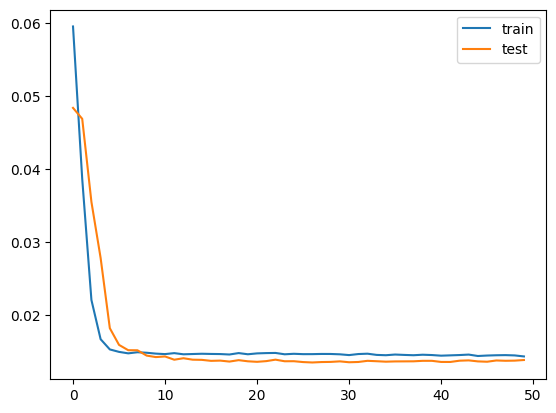

Test RMSE: 26.705


In [20]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# p2

(43797, 32)
(8760, 24) 8760 (8760,)
(8760, 3, 8) (8760,) (35037, 3, 8) (35037,)
Epoch 1/50
122/122 - 5s - loss: 0.0503 - val_loss: 0.0448
Epoch 2/50
122/122 - 1s - loss: 0.0251 - val_loss: 0.0388
Epoch 3/50
122/122 - 1s - loss: 0.0210 - val_loss: 0.0253
Epoch 4/50
122/122 - 1s - loss: 0.0205 - val_loss: 0.0231
Epoch 5/50
122/122 - 1s - loss: 0.0199 - val_loss: 0.0206
Epoch 6/50
122/122 - 1s - loss: 0.0195 - val_loss: 0.0189
Epoch 7/50
122/122 - 1s - loss: 0.0196 - val_loss: 0.0183
Epoch 8/50
122/122 - 1s - loss: 0.0188 - val_loss: 0.0176
Epoch 9/50
122/122 - 1s - loss: 0.0187 - val_loss: 0.0175
Epoch 10/50
122/122 - 1s - loss: 0.0180 - val_loss: 0.0169
Epoch 11/50
122/122 - 1s - loss: 0.0177 - val_loss: 0.0165
Epoch 12/50
122/122 - 1s - loss: 0.0172 - val_loss: 0.0163
Epoch 13/50
122/122 - 1s - loss: 0.0169 - val_loss: 0.0158
Epoch 14/50
122/122 - 1s - loss: 0.0166 - val_loss: 0.0155
Epoch 15/50
122/122 - 1s - loss: 0.0161 - val_loss: 0.0152
Epoch 16/50
122/122 - 1s - loss: 0.0158 - va

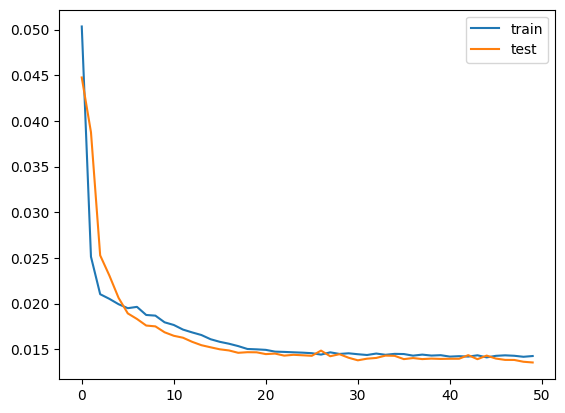

Test RMSE: 26.239


In [21]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)